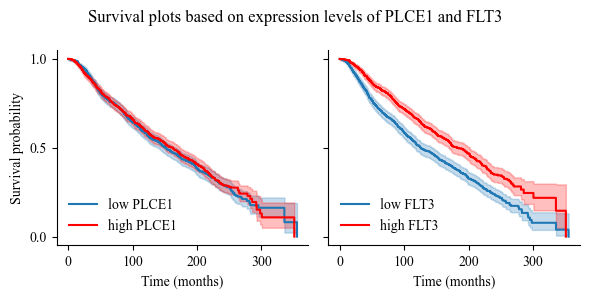

In [36]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

df = pd.read_csv('../data/metabric_example.tab', sep='\t')

# Calculate the median of the FLT3 column
median_flt3 = df['FLT3'].median()

# Create two groups: below and above median
flt3_low = df['FLT3'] <= median_flt3
flt3_high = df['FLT3'] > median_flt3


# Calculate the median of the PLCE1 column
median_plce1 = df['PLCE1'].median()

# Create two groups: below and above median
plce1_low = df['PLCE1'] <= median_plce1
plce1_high = df['PLCE1'] > median_plce1


fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 3))

kmf = KaplanMeierFitter()
kmf_low = kmf.fit(df['time'][plce1_low], df['event'][plce1_low], label='low PLCE1')
kmf_low.plot_survival_function(ax=ax[0])

kmf_high = kmf.fit(df['time'][plce1_high], df['event'][plce1_high], label='high PLCE1')
kmf_high.plot_survival_function(ax=ax[0], c='red')


kmf = KaplanMeierFitter()
kmf_low = kmf.fit(df['time'][flt3_low], df['event'][flt3_low], label='low FLT3')
kmf_low.plot_survival_function(ax=ax[1])

kmf_high = kmf.fit(df['time'][flt3_high], df['event'][flt3_high], label='high FLT3')
kmf_high.plot_survival_function(ax=ax[1], c='red')

fig.suptitle('Survival plots based on expression levels of PLCE1 and FLT3', fontsize=12) 

ax[0].set_yticks([0, 0.5, 1])
ax[1].set_yticks([0, 0.5, 1])
ax[1].set_yticklabels([])

ax[0].set_xticks([0, 100, 200, 300])
ax[1].set_xticks([0, 100, 200, 300])

ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False) 
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False) 

ax[0].legend(loc='lower left', frameon=False)
ax[1].legend(loc='lower left', frameon=False)

ax[0].set_ylabel("Survival probability")
ax[0].set_xlabel("Time (months)")
ax[1].set_xlabel("Time (months)")

fig.tight_layout()


plt.savefig('../figures/figure1_biomarker_example.pdf', dpi=300)
